# Surprise Housing Assignment
## Author: Kumaraguru Muthuraj
### Problem Statement
#### Surprise Housing wants to buy low and sell high of properties in Australia.


In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [177]:
housingDF = pd.read_csv("train.csv")

print(housingDF.shape)
housingDF.head()


(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [178]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [179]:
housingDF.YearBuilt = housingDF.YearBuilt.astype('int')
housingDF.YearRemodAdd = housingDF.YearRemodAdd.astype('int')
housingDF.MoSold = housingDF.MoSold.astype('int')
housingDF.YrSold = housingDF.YrSold.astype('int')
housingDF.GarageYrBlt = housingDF.GarageYrBlt.astype('int')


In [180]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [181]:
#Check the nulls in categorical columns
def printCategoryColsPercentNotNull(df):
    cols = df.select_dtypes(include=['object']).columns
    print("Category columns ", cols)
    print("Column count ", len(cols))

    colWithNull = 0
    for col in cols:
        total = df[col].size
        notNull = df[col].count()
        if  notNull != total:
            colWithNull += 1
            print('**********************')
            print('Column name ', col , '*** Percentage not null ', 100*notNull/total )
            print(' ')
            
    if colWithNull == 0:
        print("No columns have null values")

    return 

#Impute rest of the columns with 'None' for Nulls
def imputeCategoryColumnNullsWithNone(df):
    cols = df.select_dtypes(include=['object']).columns
    print("Category columns ", cols)
    print("Column count ", len(cols))
    
    for col in cols:
        total = df[col].size
        notNull = df[col].count()
        if  notNull != total:
            df[col] = df[col].fillna("None")
    return

def printNumericColsPercentNotNull(df):
    cols = df.select_dtypes(include=['int64', 'float64']).columns
    print("Numerical columns ", cols)
    print("Column count ", len(cols))

    colWithNull = 0
    for col in cols:
        total = df[col].size
        notNull = df[col].count()
        if  notNull != total:
            colWithNull += 1
            print('**********************')
            print('Column name ', col , '*** Percentage not null ', 100*notNull/total )
            print(' ')
    
    if colWithNull == 0:
        print("No columns have null values")

    return 


#Impute numeric columns with 'Median' for Nulls
def imputeNumericColumnNullsWithNone(df):
    cols = df.select_dtypes(include=['int64', 'float64']).columns
    print("Numerical columns ", cols)
    print("Column count ", len(cols))
    
    for col in cols:
        total = df[col].size
        notNull = df[col].count()
        if  notNull != total:
            df[col] = df[col].fillna(df[col].median())
    return

def getLowerAndUpperFence(df, col):
    q1 = np.quantile(df[col], .25)
    q3 = np.quantile(df[col], .75)
    base = (q3 - q1) * 1.5
    lFen  = q1 - base
    uFen = q3 + base
    return (lFen, uFen)

def getPercentOfOutliers(df, col, l, u):
    lFilter = df[col] < l
    uFilter = df[col] > u
    
    low = df[lFilter] 
    high = df[uFilter]
    
    lPer = 100*len(low) / len(df)
    hPer = 100*len(high) / len(df)
    
    return (lPer, hPer)

#Util function to cap
def capper(x, l, u):
    if x < l:
        return (l - 0.1 * (u - l))
    elif u < x:
        return (u + 0.1 * (u - l))        
    return x

#Cap lower and upper limit
def capLowerAndUpperLimit(df, col, l, u):
    df[col] = df[col].apply(capper, args=(l, u))
    return

#Check outliers in numberic columns - print percent of 
#low and high outliers for each column
def checkOutliersInNumericColumns(df, cols):
    if len(cols) == 0:
        cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    print("Numerical columns ", cols)
    print("Column count ", len(cols))
    
    for col in cols:
        plt.figure(figsize=(6,3))
        sns.boxplot(x = df[col])
        plt.xlabel(col, fontsize=14)
        plt.title(col, fontsize=16)
        plt.show()
        
        l, u = getLowerAndUpperFence(housingDF, col)
        lp, hp = getPercentOfOutliers(housingDF, col, l, u)
        
        print(col, " - Percent of outliers below lower fence ", lp, " and above upper fence ", hp)        
    return

#Pass a list of numeric column names that you want to cap up to 10% of IQR
def capNumericColumnOutliers(df, cols):
    for col in cols:
        l, u = getLowerAndUpperFence(df, col)
        capLowerAndUpperLimit(df, col, l, u)
    return


In [182]:
printCategoryColumnsPercentNNull(housingDF)

Category columns  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Column count  43
**********************
Column name  Alley *** Percentage not null  6.232876712328767
 
**********************
Column name  MasVnrType *** Percentage not null  99.45205479452055
 
**********************
Column name  BsmtQual *** Percentage not null  97.46575342465754
 
**********************
Column n

In [183]:
#Drop 'Alley', 'PoolQC' and 'MiscFeature' column because they have very high null values
housingDF.drop(['Alley', 'PoolQC', 'MiscFeature'], inplace=True, axis=1)
#Impute nulls and check for nulls
imputeCategoryColumnNullsWithNone(housingDF)
printCategoryColumnsPercentNNull(housingDF)

Category columns  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')
Column count  40
Category columns  Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond

In [184]:
printNumericColsPercentNotNull(housingDF)
imputeNumericColumnNullsWithNone(housingDF)

Numerical columns  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')
Column count  34
**********************
Column name  LotFrontage *** Percentage not null  82.26027397260275
 
**********************
Column name  MasVnrArea *** Percentage not null  99.45205479452055
 
**********************
Column name  GarageYrBlt *** Percentage not null  94.45205479452055
 
Numerical columns  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 

In [185]:
printNumericColsPercentNotNull(housingDF)

Numerical columns  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')
Column count  34
No columns have null values


Numerical columns  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')
Column count  34


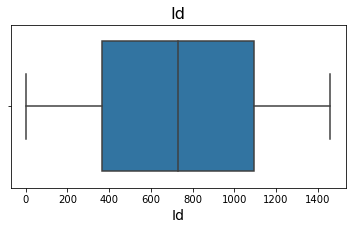

Id  - Percent of outliers below lower fence  0.0  and above upper fence  0.0


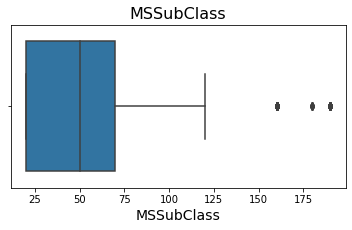

MSSubClass  - Percent of outliers below lower fence  0.0  and above upper fence  7.054794520547945


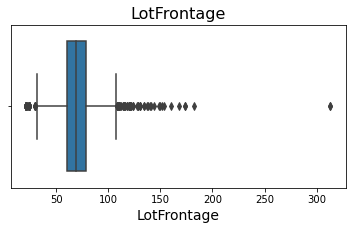

LotFrontage  - Percent of outliers below lower fence  3.287671232876712  and above upper fence  3.9726027397260273


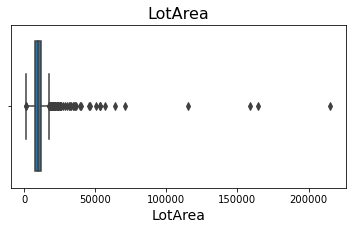

LotArea  - Percent of outliers below lower fence  0.136986301369863  and above upper fence  4.589041095890411


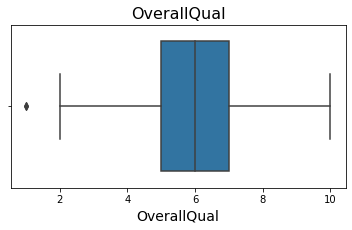

OverallQual  - Percent of outliers below lower fence  0.136986301369863  and above upper fence  0.0


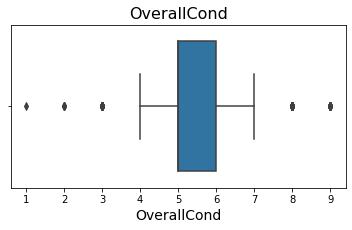

OverallCond  - Percent of outliers below lower fence  2.1232876712328768  and above upper fence  6.438356164383562


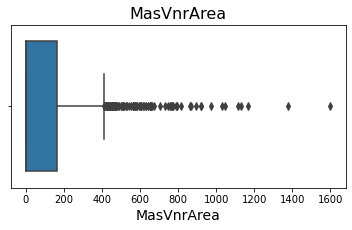

MasVnrArea  - Percent of outliers below lower fence  0.0  and above upper fence  6.712328767123288


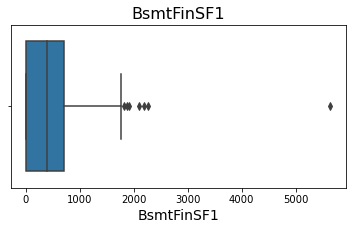

BsmtFinSF1  - Percent of outliers below lower fence  0.0  and above upper fence  0.4794520547945205


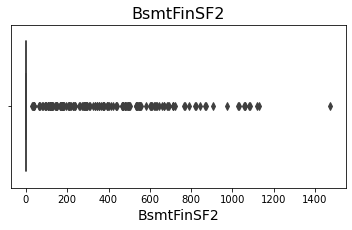

BsmtFinSF2  - Percent of outliers below lower fence  0.0  and above upper fence  11.438356164383562


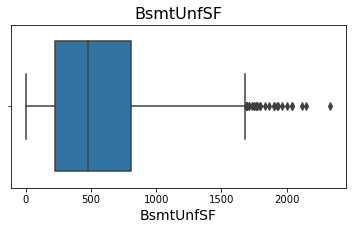

BsmtUnfSF  - Percent of outliers below lower fence  0.0  and above upper fence  1.9863013698630136


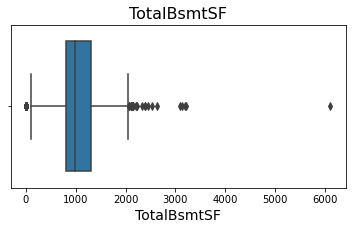

TotalBsmtSF  - Percent of outliers below lower fence  2.5342465753424657  and above upper fence  1.643835616438356


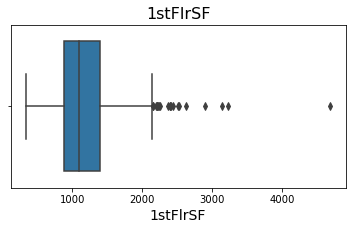

1stFlrSF  - Percent of outliers below lower fence  0.0  and above upper fence  1.36986301369863


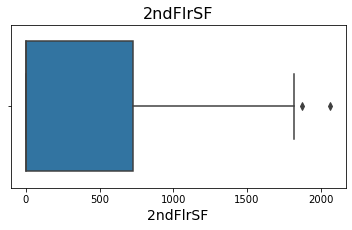

2ndFlrSF  - Percent of outliers below lower fence  0.0  and above upper fence  0.136986301369863


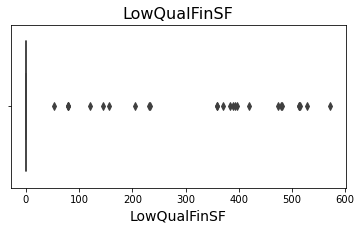

LowQualFinSF  - Percent of outliers below lower fence  0.0  and above upper fence  1.7808219178082192


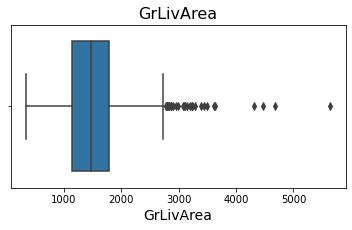

GrLivArea  - Percent of outliers below lower fence  0.0  and above upper fence  2.1232876712328768


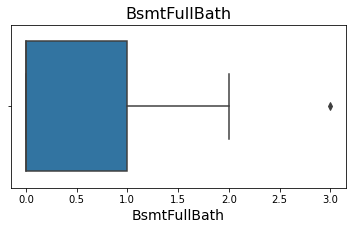

BsmtFullBath  - Percent of outliers below lower fence  0.0  and above upper fence  0.0684931506849315


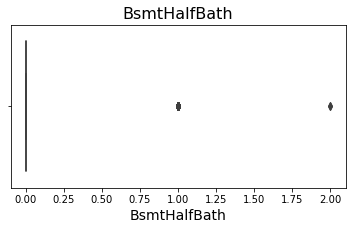

BsmtHalfBath  - Percent of outliers below lower fence  0.0  and above upper fence  5.616438356164384


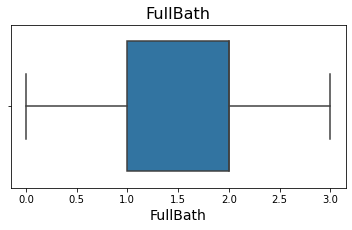

FullBath  - Percent of outliers below lower fence  0.0  and above upper fence  0.0


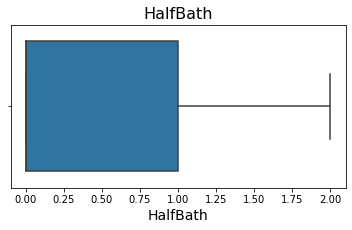

HalfBath  - Percent of outliers below lower fence  0.0  and above upper fence  0.0


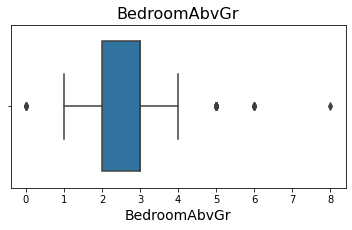

BedroomAbvGr  - Percent of outliers below lower fence  0.410958904109589  and above upper fence  1.9863013698630136


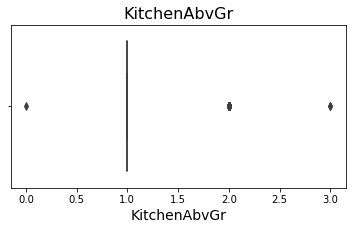

KitchenAbvGr  - Percent of outliers below lower fence  0.0684931506849315  and above upper fence  4.589041095890411


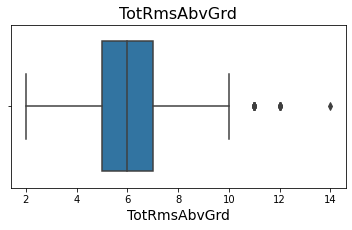

TotRmsAbvGrd  - Percent of outliers below lower fence  0.0  and above upper fence  2.0547945205479454


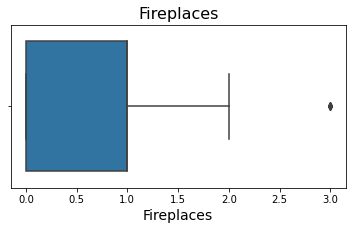

Fireplaces  - Percent of outliers below lower fence  0.0  and above upper fence  0.3424657534246575


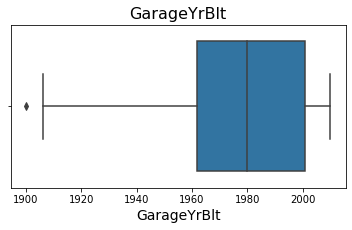

GarageYrBlt  - Percent of outliers below lower fence  0.0684931506849315  and above upper fence  0.0


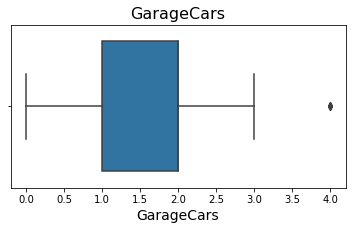

GarageCars  - Percent of outliers below lower fence  0.0  and above upper fence  0.3424657534246575


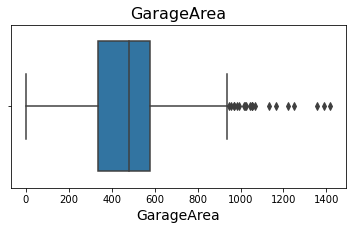

GarageArea  - Percent of outliers below lower fence  0.0  and above upper fence  1.4383561643835616


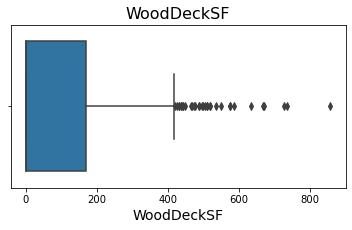

WoodDeckSF  - Percent of outliers below lower fence  0.0  and above upper fence  2.191780821917808


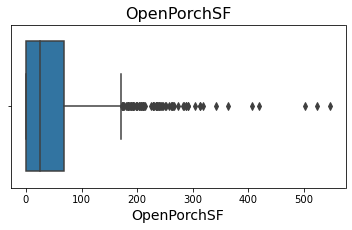

OpenPorchSF  - Percent of outliers below lower fence  0.0  and above upper fence  5.273972602739726


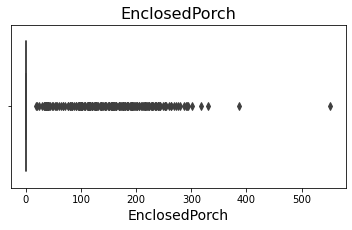

EnclosedPorch  - Percent of outliers below lower fence  0.0  and above upper fence  14.246575342465754


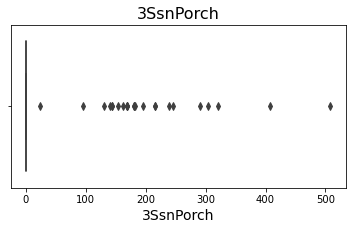

3SsnPorch  - Percent of outliers below lower fence  0.0  and above upper fence  1.643835616438356


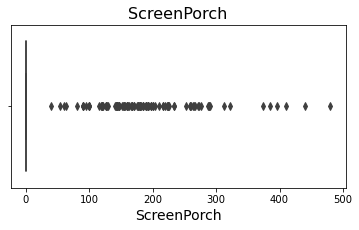

ScreenPorch  - Percent of outliers below lower fence  0.0  and above upper fence  7.945205479452055


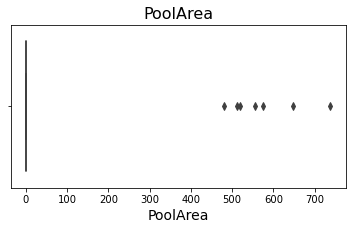

PoolArea  - Percent of outliers below lower fence  0.0  and above upper fence  0.4794520547945205


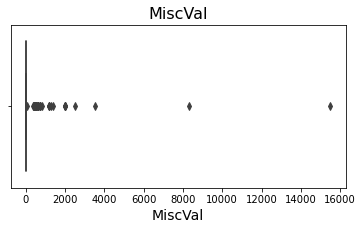

MiscVal  - Percent of outliers below lower fence  0.0  and above upper fence  3.5616438356164384


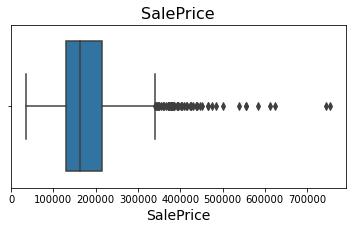

SalePrice  - Percent of outliers below lower fence  0.0  and above upper fence  4.178082191780822


In [186]:
#Ignore ID
checkOutliersInNumericColumns(housingDF, [])

In [191]:
capNumericColumnOutliers(housingDF, ['SalePrice'])

Numerical columns  ['SalePrice']
Column count  1


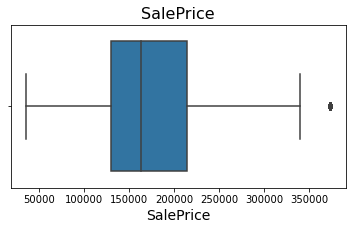

SalePrice  - Percent of outliers below lower fence  0.0  and above upper fence  4.178082191780822


In [192]:
checkOutliersInNumericColumns(housingDF, ['SalePrice'])